**В этом ноутбуке я исследую датасет, содержащий информацию о тысячах различных книг. 
Я высню, какие книги являются самыми популярными и имеют наивысшие оценки от читателей**

In [73]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


df = pd.read_csv('books.csv',error_bad_lines=False)


b'Skipping line 3350: expected 12 fields, saw 13\nSkipping line 4704: expected 12 fields, saw 13\nSkipping line 5879: expected 12 fields, saw 13\nSkipping line 8981: expected 12 fields, saw 13\n'


In [54]:
df.shape #узнаем количество строк и столбцов в датасете

(11123, 12)

**Data Cleaning**

In [55]:
df.drop(['bookID','isbn','isbn13'],axis = 1,inplace=True)
df.head(2)

,title,authors,average_rating,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
0,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,eng,652,2095690,27591,9/16/2006,Scholastic Inc.
1,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,eng,870,2153167,29221,9/1/2004,Scholastic Inc.


**Data Visualisation**

**Найдем количество книг написанных на разных языках.**

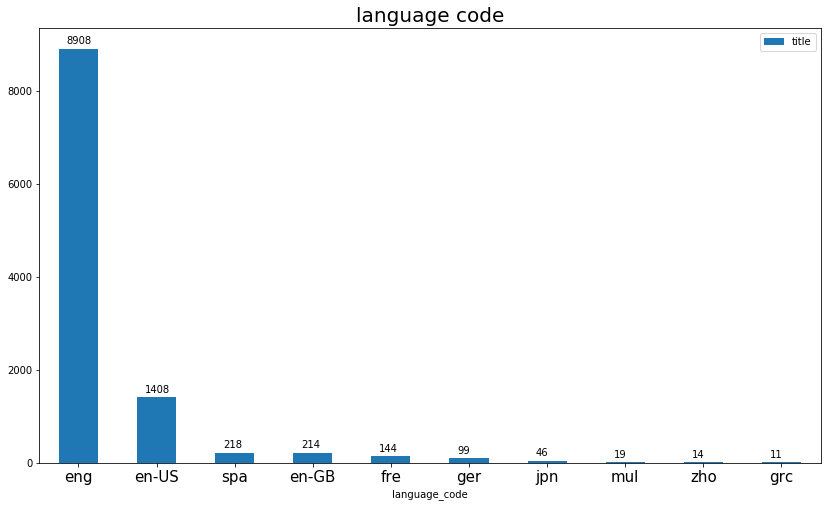

In [56]:
ax =df.groupby('language_code')['title'].count().reset_index().sort_values('title',ascending=False).head(10).set_index('language_code').plot.bar(figsize=(14,8),rot=0)
plt.title('language code',fontsize=20)
plt.xticks(fontsize=15)
for p in ax.patches:
    ax.annotate(str(p.get_height()),(p.get_x()+0.1,p.get_height()+100))

**Как можно заметить, большая часть книг написана на английском языке. Давайте сконцентрируемся на них**

In [57]:
df = df[(df.language_code =='eng')|(df.language_code =='eng-US')|(df.language_code =='eng-GB')]
df.head(2)

,title,authors,average_rating,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
0,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,eng,652,2095690,27591,9/16/2006,Scholastic Inc.
1,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,eng,870,2153167,29221,9/1/2004,Scholastic Inc.


**Топ 10 книг по количеству оценок**

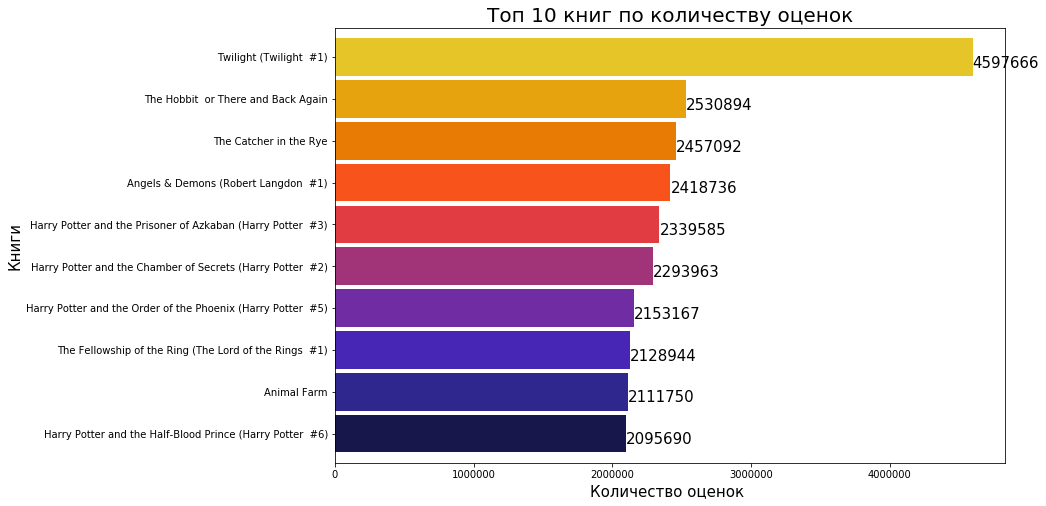

In [58]:

most_rated = df.sort_values('ratings_count',ascending=False).head(10).set_index('title')
plt.subplots(figsize=(12,8))
ax = most_rated['ratings_count'].sort_values().plot.barh(width=0.9,color=sns.color_palette('CMRmap',12))
ax.set_xlabel("Количество оценок ", fontsize=15)
ax.set_ylabel("Книги", fontsize=15)
ax.set_title("Топ 10 книг по количеству оценок",fontsize=20,color='black')
totals = []
for i in ax.patches:
    totals.append(i.get_width())
total = sum(totals)
for i in ax.patches:
    ax.text(i.get_width()+3, i.get_y()+.2,str(round(i.get_width())), fontsize=15,color='black')
plt.show()

**Топ 10 книг по количеству рецензий**

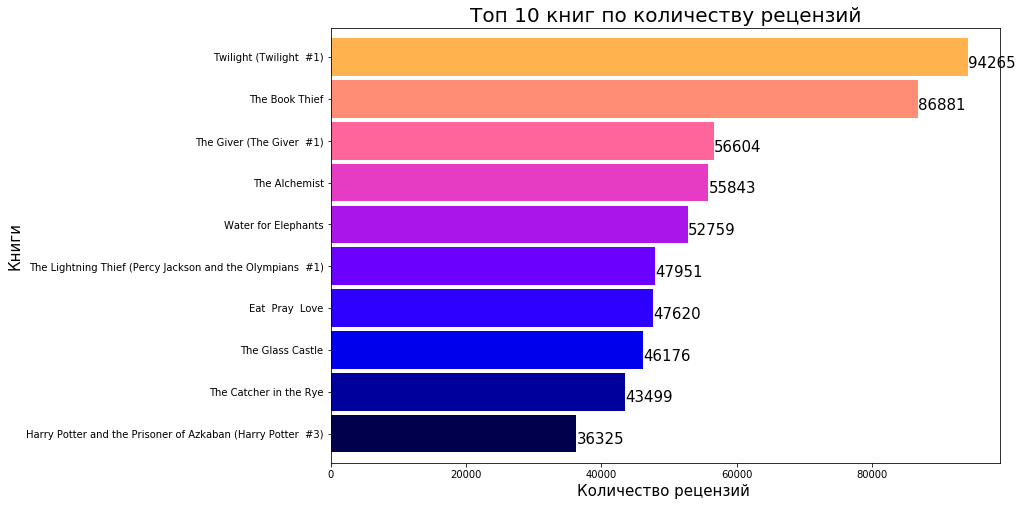

In [59]:
most_text_reviews = df.sort_values('text_reviews_count',ascending=False).head(10).set_index('title')
plt.subplots(figsize=(12,8))
ax = most_text_reviews['text_reviews_count'].sort_values().plot.barh(width=0.9,color=sns.color_palette('gnuplot2',12))
ax.set_xlabel("Количество рецензий ", fontsize=15)
ax.set_ylabel("Книги", fontsize=15)
ax.set_title("Топ 10 книг по количеству рецензий",fontsize=20,color='black')
totals = []
for i in ax.patches:
    totals.append(i.get_width())
total = sum(totals)
for i in ax.patches:
    ax.text(i.get_width()+3, i.get_y()+.2,str(round(i.get_width())), fontsize=15,color='black')
plt.show()

**Как можно увидеть выше, по количеству оценок и рецензий первенство у "Сумерек"**

**Топ 10 книг по среднему рейтингу**

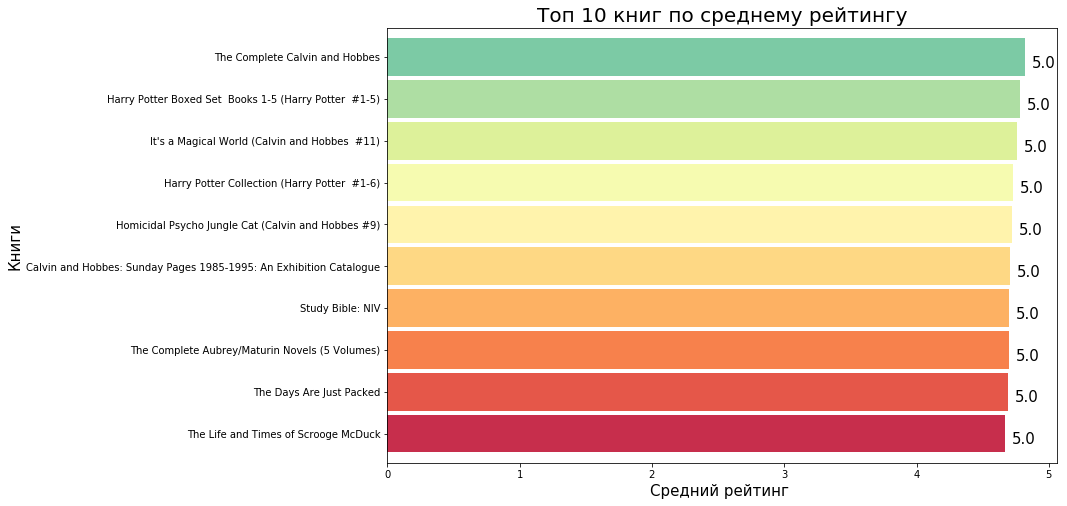

In [60]:
high_average_rating =df[df['ratings_count'] > 1000]
high_average_rating = high_average_rating.sort_values('average_rating',ascending=False).head(10).set_index('title')
plt.subplots(figsize=(12,8))
ax = high_average_rating['average_rating'].sort_values().plot.barh(width=0.9,color=sns.color_palette('Spectral',12))
ax.set_xlabel("Средний рейтинг ", fontsize=15)
ax.set_ylabel("Книги", fontsize=15)
ax.set_title("Топ 10 книг по среднему рейтингу",fontsize=20,color='black')
totals = []
for i in ax.patches:
    totals.append(i.get_width())
total = sum(totals)
for i in ax.patches:
    ax.text(i.get_width()+.05, i.get_y()+.2,str(round(i.get_width())), fontsize=15,color='black')
plt.show()

**Авторы с наибольшим числом книг**

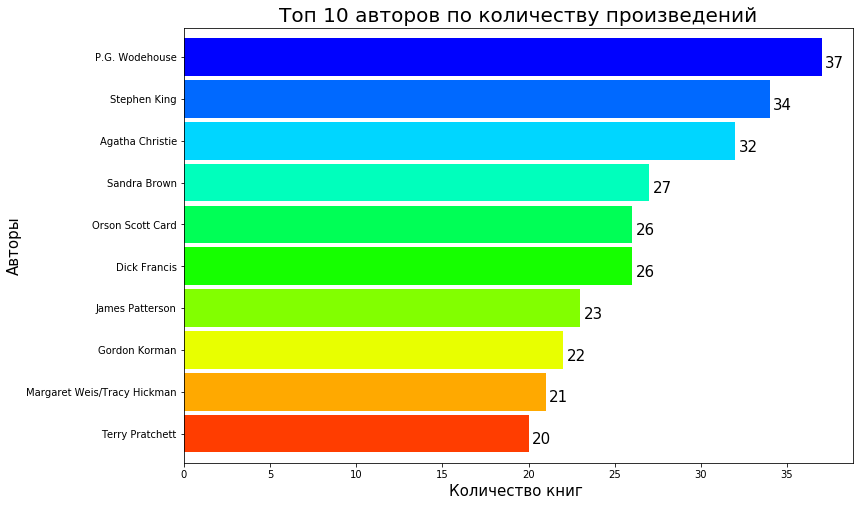

In [61]:
author_of_most_books = df.groupby('authors')['title'].count().reset_index().sort_values('title',ascending=False).head(10).set_index('authors')
plt.subplots(figsize=(12,8))
ax = author_of_most_books['title'].sort_values().plot.barh(width=0.9,color=sns.color_palette('gist_rainbow',12))
ax.set_xlabel("Количество книг ", fontsize=15)
ax.set_ylabel("Авторы", fontsize=15)
ax.set_title("Топ 10 авторов по количеству произведений",fontsize=20,color='black')
totals = []
for i in ax.patches:
    totals.append(i.get_width())
total = sum(totals)
for i in ax.patches:
    ax.text(i.get_width()+.2, i.get_y()+.2,str(round(i.get_width())), fontsize=15,color='black')
plt.show()

**Распределение средних оценок книг**

Давайте посмотрим, как вообще распределены оценки книг.

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,0,'Средняя оценка')

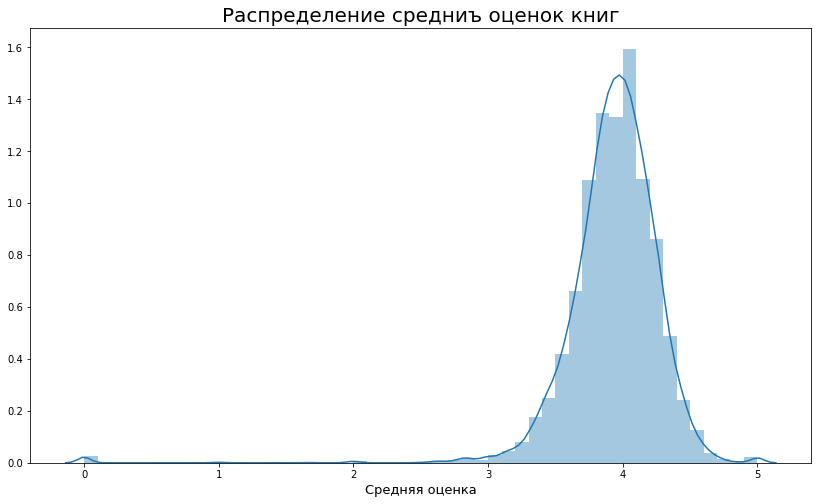

In [62]:
dist = df
dist.average_rating = dist.average_rating.astype(float)
fig, ax = plt.subplots(figsize=[14,8])
sns.distplot(dist['average_rating'],ax=ax)
ax.set_title('Распределение средниъ оценок книг',fontsize=20)
ax.set_xlabel('Средняя оценка',fontsize=13)

**Как можно видеть, средняя оценка книг составляет примерно 4 балла из 5**

**Топ 10 авторов по количеству книг с высокими оценками**

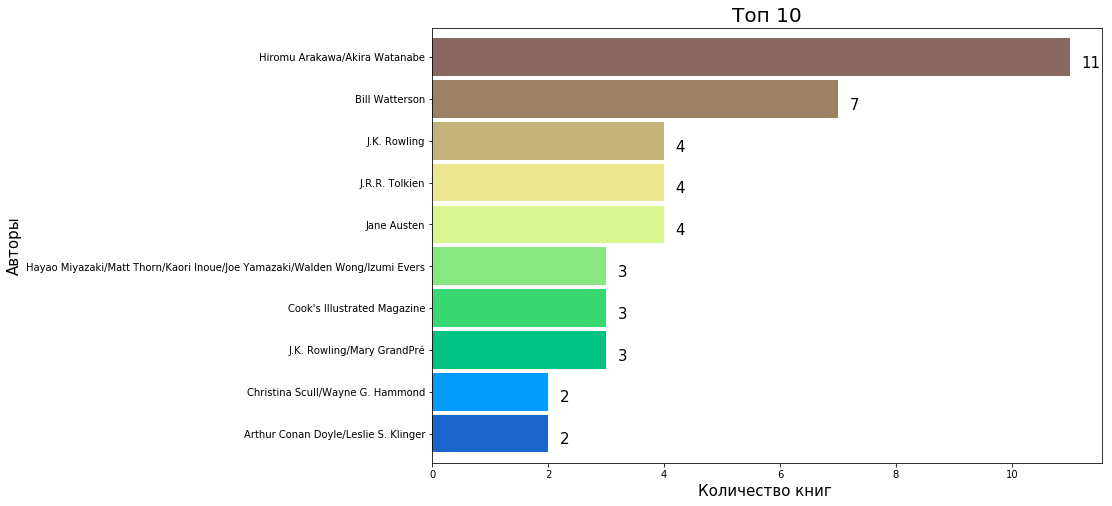

In [24]:
highly_rated_author =df[df['average_rating']>4.5]
highly_rated_author = highly_rated_author.groupby('authors')['title'].count().reset_index().sort_values('title',ascending=False).head(10).set_index('authors')
plt.subplots(figsize=(12,8))
ax = highly_rated_author['title'].sort_values().plot.barh(width=0.9,color=sns.color_palette('terrain',12))
ax.set_xlabel("Количество книг ", fontsize=15)
ax.set_ylabel("Авторы", fontsize=15)
ax.set_title("Топ 10",fontsize=20,color='black')
totals = []
for i in ax.patches:
    totals.append(i.get_width())
total = sum(totals)
for i in ax.patches:
    ax.text(i.get_width()+.2, i.get_y()+.2,str(round(i.get_width())), fontsize=15,color='black')
plt.show()